<a href="https://colab.research.google.com/github/threegenie/vgames_project/blob/main/game_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data as df
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/vgames2.csv')
df = df.drop('Unnamed: 0',axis=1)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 오류(SettingWithCopyError 발생)
pd.set_option('mode.chained_assignment', 'raise') # SettingWithCopyError

# 경고(SettingWithCopyWarning 발생, 기본 값입니다)
pd.set_option('mode.chained_assignment', 'warn') # SettingWithCopyWarning

# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [3]:
#데이터 타입 확인
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
#결측값 제거
df = df.dropna(axis=0)
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
#년도 오류 값 결측치 처리 후 정수로 변환
df['Year'] = np.where( df['Year'] <=100,0,df['Year'] )
df['Year'] = df['Year'].replace(0,np.nan)
df.dropna(axis=0,inplace=True)
df['Year'] = df['Year'].astype(int)
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
#M단위 제거
def replace_M(x):
  return x.str.replace('M','')

df['NA_Sales'] = replace_M(df['NA_Sales'])
df['EU_Sales'] = replace_M(df['EU_Sales'])
df['JP_Sales'] = replace_M(df['JP_Sales'])
df['Other_Sales'] = replace_M(df['Other_Sales'])

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
#K단위 제거
def replace_K(x):
  return x.str.replace('K','')

df['NA_Sales'] = replace_K(df['NA_Sales'])
df['EU_Sales'] = replace_K(df['EU_Sales'])
df['JP_Sales'] = replace_K(df['JP_Sales'])
df['Other_Sales'] = replace_K(df['Other_Sales'])

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [8]:
#Sales 칼럼들 전부 numeric으로 변경
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [9]:
#K단위를 M단위로 변경 - 1000배 차이이므로 0.001 곱해줌
df['NA_Sales'] = np.where( df['NA_Sales'] >= 10,df['NA_Sales']*0.001,df['NA_Sales'])
df['EU_Sales'] = np.where( df['EU_Sales'] >= 10,df['EU_Sales']*0.001,df['EU_Sales'])
df['JP_Sales'] = np.where( df['JP_Sales'] >= 10,df['JP_Sales']*0.001,df['JP_Sales'])
df['Other_Sales'] = np.where( df['Other_Sales'] >= 10,df['Other_Sales']*0.001,df['Other_Sales'])

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [10]:
#Sales 칼럼들에 1000000 곱해줌 - M단위로 변환하고 보기 쉽도록
"""
df['NA_Sales'] = df['NA_Sales']*1000000
df['EU_Sales'] = df['EU_Sales']*1000000
df['JP_Sales'] = df['JP_Sales']*1000000
df['Other_Sales'] = df['Other_Sales']*1000000

df.head()
"""

"\ndf['NA_Sales'] = df['NA_Sales']*1000000\ndf['EU_Sales'] = df['EU_Sales']*1000000\ndf['JP_Sales'] = df['JP_Sales']*1000000\ndf['Other_Sales'] = df['Other_Sales']*1000000\n\ndf.head()\n"

In [11]:
#Sales 데이터를 int로 변환
"""
df['NA_Sales'] = df['NA_Sales'].astype(int)
df['EU_Sales'] = df['EU_Sales'].astype(int)
df['JP_Sales'] = df['JP_Sales'].astype(int)
df['Other_Sales'] = df['Other_Sales'].astype(int)

df.head()
"""

"\ndf['NA_Sales'] = df['NA_Sales'].astype(int)\ndf['EU_Sales'] = df['EU_Sales'].astype(int)\ndf['JP_Sales'] = df['JP_Sales'].astype(int)\ndf['Other_Sales'] = df['Other_Sales'].astype(int)\n\ndf.head()\n"

In [12]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

**-전처리 완료**

플랫폼/장르/게임사/년도 로 그룹지어서 각 나라별로 세일즈 비교

Text(0, 0.5, 'Genre')

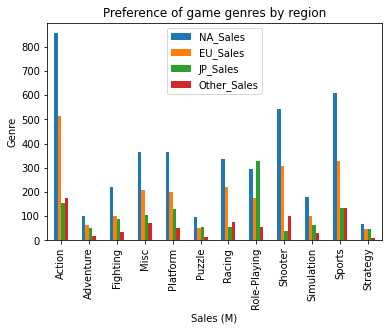

In [29]:
#지역에 따른 게임 장르 선호도 - 매출액 비교
gr = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
gr = gr.groupby('Genre').sum() #단위 M
#label = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

gr.plot(kind='bar')
plt.title('Preference of game genres by region')
plt.xlabel('Sales (M)')
plt.ylabel('Genre')


Text(0, 0.5, 'Genre')

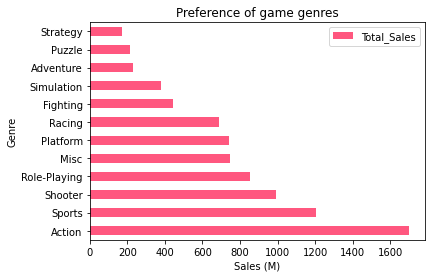

In [30]:
#지역에 따른 게임 장르 선호도 - 매출액 비교 2
#지역별 매출액 총합에 따른 게임 장르 선호도
gr['Total_Sales'] = gr.sum(axis=1)
gr1 = gr.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
gr1 = gr1.sort_values(by='Total_Sales',ascending=False)
gr1.plot(kind='barh',color='#ff577f')
plt.title('Preference of game genres')
plt.xlabel('Sales (M)')
plt.ylabel('Genre')

Top 5 revenue game : Action, Sports, Shooter, Role-Playing,Misc

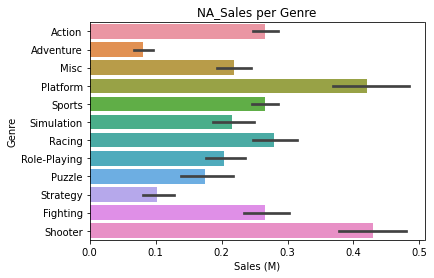

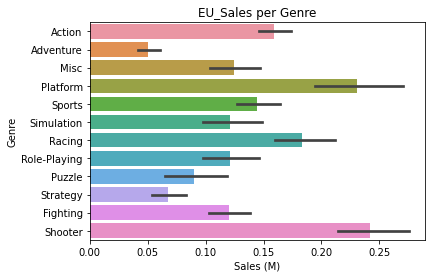

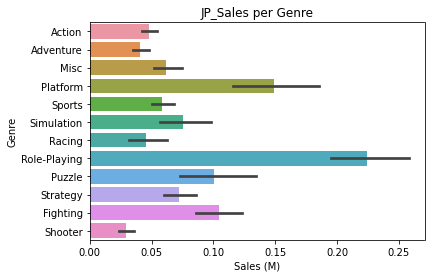

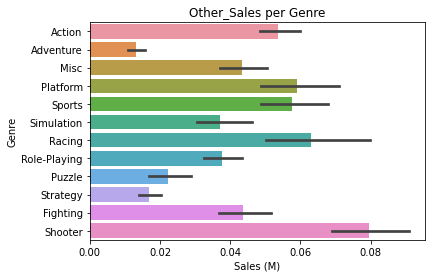

In [31]:
##지역에 따른 게임 장르 선호도 - 매출액 비교 3
sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

for i in sales:
    plt.figure()
    ax = sns.barplot(x=i, y="Genre", data=df,dodge=False)
    plt.title(f"{i} per Genre")
    plt.xlabel('Sales (M)')
    plt.ylabel('Genre')

Text(0.5, 1.0, 'Preference of game genres by year')

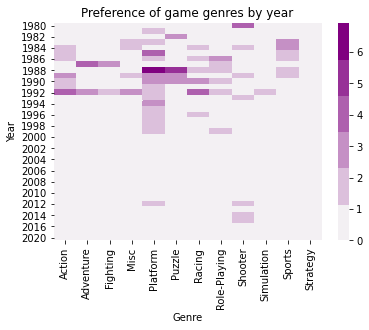

In [56]:
#년도별 게임 장르 선호도
year_genre = df[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
year_genre1 = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
year_genre['Total Sales'] = year_genre1.sum(axis=1)
year_genre = year_genre[['Genre','Year','Total Sales']]

yg = pd.pivot_table(year_genre, index = 'Year', columns = 'Genre', values = 'Total Sales')
yg = yg.fillna(0)
cmap = sns.light_palette("purple")
ax = sns.heatmap(yg,cmap=cmap)
ax.set_xlabel('Genre')
ax.set_ylabel('Year')
ax.set_title('Preference of game genres by year')

In [17]:
#지역별 게임 플랫폼 선호도

pf = df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
pf = pf.groupby('Platform').sum()
pf.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,80.32000,4.830,0.00000,0.83
3DO,0.00000,0.000,0.10000,0.00
3DS,72.76000,54.180,92.53000,11.75
DC,5.43000,1.690,8.56000,0.27
DS,370.00138,179.601,168.73000,59.33
GB,68.38530,47.510,74.71022,8.16
GBA,178.14000,72.380,46.51000,7.51
GC,131.45000,38.200,20.83000,5.10
GEN,19.27000,5.520,2.67000,0.89


Text(0, 0.5, 'Sales (M)')

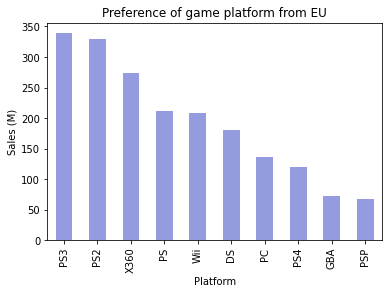

In [18]:
#유럽의 게임 플랫폼 선호도 - 매출액 top 10
pf1 = pf.sort_values(by='EU_Sales',ascending=False)
pf1 = pf1[0:10]

pf1['EU_Sales'].plot(kind='bar',color='#949cdf')
plt.title('Preference of game platform from EU')
plt.xlabel('Platform')
plt.ylabel('Sales (M)')

European TOP 5 : PS3, PS2, X360, PS, Wii

PS3, PS2가 독보적

Text(0, 0.5, 'Sales (M)')

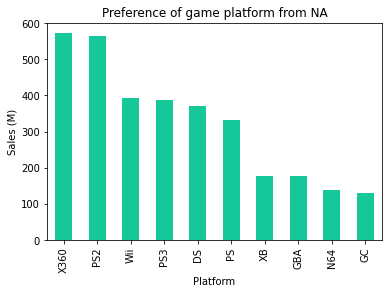

In [19]:
#북미의 게임 플랫폼 선호도 - 매출액 top 10
pf2 = pf.sort_values(by='NA_Sales',ascending=False)
pf2 = pf2[0:10]
pf2['NA_Sales'].plot(kind='bar',color='#16c79a')
plt.title('Preference of game platform from NA')
plt.xlabel('Platform')
plt.ylabel('Sales (M)')

North American TOP 5 : X360, PS2, Wii, PS3, DS

X360과 PS2가 독보적

Text(0, 0.5, 'Sales (M)')

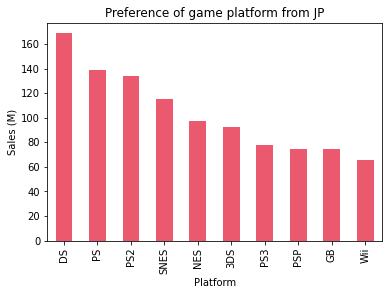

In [20]:
#일본의 게임 플랫폼 선호도 - 매출액 top 10
pf3 = pf.sort_values(by='JP_Sales',ascending=False)
pf3 = pf3[0:10]
pf3['JP_Sales'].plot(kind='bar',color='#eb596e')
plt.title('Preference of game platform from JP')
plt.xlabel('Platform')
plt.ylabel('Sales (M)')

Japanese TOP 5 : DS, PS, PS2, SNES, NES

DS가 독보적

Text(0, 0.5, 'Sales (M)')

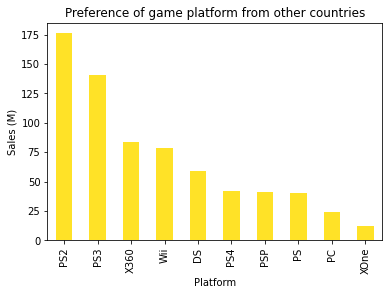

In [21]:
#기타 지역의 게임 플랫폼 선호도 - 매출액 top 10
pf4 = pf.sort_values(by='Other_Sales',ascending=False)
pf4 = pf4[0:10]
pf4['Other_Sales'].plot(kind='bar',color='#ffe227')
plt.title('Preference of game platform from other countries')
plt.xlabel('Platform')
plt.ylabel('Sales (M)')

Other region TOP 5 : PS5, PS3, X360, Wii, DS

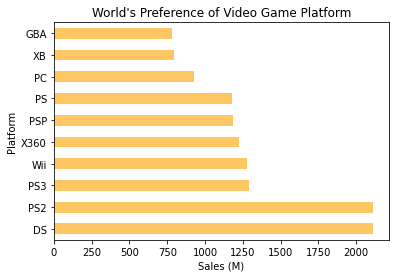

In [22]:
#전체 지역 플랫폼별 선호도
ptgr = pd.crosstab(df.Platform, df.Genre)
ptgr_total = ptgr.sum(axis=1).sort_values(ascending=False)
ptgr_top_10 = ptgr_total[0:10]
plt.figure()
ptgr_top_10.plot(kind='barh',color='#ffc764')
plt.xlabel('Sales (M)')
plt.ylabel('Platform')
plt.title('World\'s Preference of Video Game Platform')
plt.show()

DS와 PS2의 전체 시장 매출이 매우 높다. 다만 DS는 일본에서의 매출이 높은 편이고, PS는 전체 시장에서 높은 비율을 차지하고 있다. 특히 PS2와 PS3의 매출을 더하면 DS의 매출의 1.5배 이상이 될 만큼 독보적이다. 

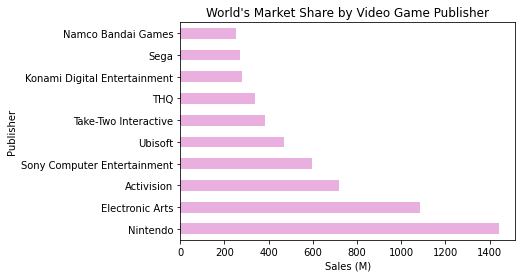

In [23]:
#회사 점유율 top 10
df1 = df.drop('Year',axis=1)
cp = df1.groupby('Publisher').sum()
cp['Sum'] = cp.sum(axis=1)
cp = cp.sort_values(by='Sum',ascending=False)
cp_sum = cp['Sum']
cp_top_10 = cp_sum[0:10]
cp_top_10.plot(kind='barh',color='#e9b0df')
plt.xlabel('Sales (M)')
plt.ylabel('Publisher')
plt.title('World\'s Market Share by Video Game Publisher')
plt.show()

Top 3 Publisher : Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, Ubisoft

Nintendo와 Electronic Arts가 시장을 거의 독점하고 있다.

Text(0, 0.5, 'Sales (M)')

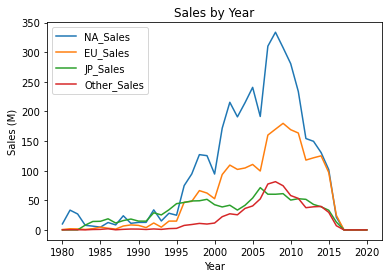

In [24]:
#년도별 시장 규모 변화
ys = df.groupby('Year').sum()
ys.plot()
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (M)')

1980년부터 2005년까지 매출이 상승세를 유지하다가 2005년~2010년 사이에 매출이 가장 높았지만 그 이후로는 계속 하락세였으며 특히 2015년부터는 매출이 거의 0에 가깝다.

Text(0.5, 0, 'Sales (M)')

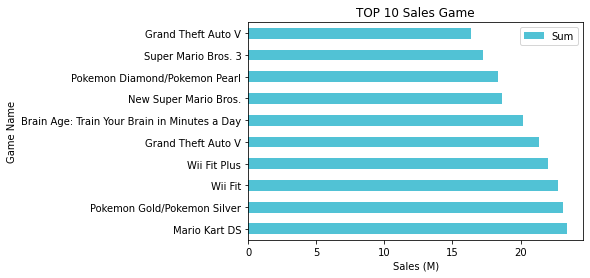

In [25]:
#매출 상위 top 10 게임
pr = df[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
pr['Sum'] = pr.sum(axis=1)
pr = pr.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
pr = pr.sort_values(by='Sum',ascending=False)
pr_top_10 = pr[0:10]
pr_top_10.plot('Name','Sum',kind='barh',color='#51c2d5')
plt.title('TOP 10 Sales Game')
plt.ylabel('Game Name')
plt.xlabel('Sales (M)')

Text(0.5, 0, 'Sales (M)')

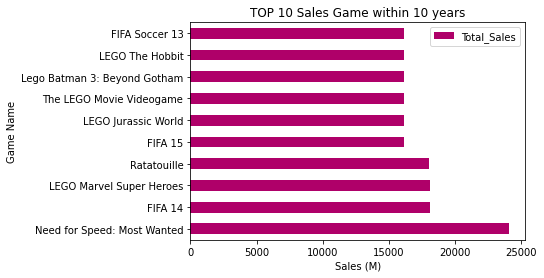

In [26]:
#최근 10년간 매출 상위 10이었던 게임
ys_10 = df[['Year','Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ys_10['Total_Sales'] = ys_10.sum(axis=1)
ys_10 = ys_10.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
ys_10 = ys_10.loc[ys_10['Year']>=2000,:]
ys_10.set_index('Name')
ys_10 = ys_10.groupby('Name').sum()
ys_10 = ys_10.sort_values(by='Total_Sales',ascending=False)
ys_10 = ys_10.drop('Year',axis=1)
ys_10 = ys_10[0:10]
ys_10.plot(kind='barh',color='#af0069')
plt.title('TOP 10 Sales Game within 10 years')
plt.ylabel('Game Name')
plt.xlabel('Sales (M)')


Text(0.5, 0, 'Sales (1000M)')

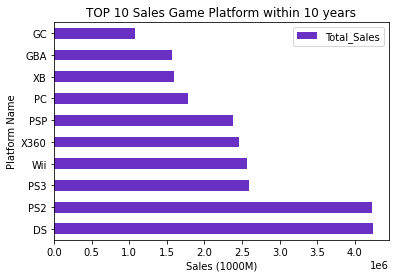

In [27]:
#최근 10년간 매출 상위 10이었던 플랫폼 
ys10 = df[['Year','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ys10['Total_Sales'] = ys10.sum(axis=1)
ys10 = ys10.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
ys10 = ys10.loc[ys10['Year']>=2000,:]
ys10.set_index('Platform')
ys10 = ys10.groupby('Platform').sum()
ys10 = ys10.sort_values(by='Total_Sales',ascending=False)
ys10 = ys10.drop('Year',axis=1)
ys10 = ys10[0:10]
ys10.plot(kind='barh',color='#6930c3')
plt.title('TOP 10 Sales Game Platform within 10 years')
plt.ylabel('Platform Name')
plt.xlabel('Sales (1000M)')

Text(0.5, 0, 'Sales (M)')

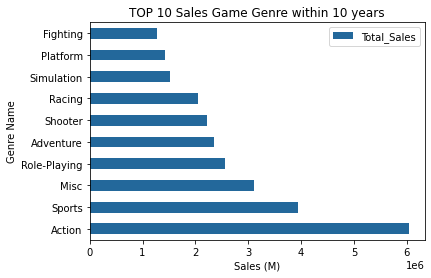

In [28]:
#최근 10년간 매출 상위 10이었던 장르
ys_gr = df[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ys_gr['Total_Sales'] = ys_gr.sum(axis=1)
ys_gr = ys_gr.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
ys_gr = ys_gr.loc[ys_gr['Year']>=2000,:]
ys_gr.set_index('Genre')
ys_gr = ys_gr.groupby('Genre').sum()
ys_gr = ys_gr.sort_values(by='Total_Sales',ascending=False)
ys_gr = ys_gr.drop('Year',axis=1)
ys_gr = ys_gr[0:10]
ys_gr.plot(kind='barh',color='#23689b')
plt.title('TOP 10 Sales Game Genre within 10 years')
plt.ylabel('Genre Name')
plt.xlabel('Sales (M)')